# Comparing sparse and dense vector & matrix multiplication

We compare "csc", "csr", "bsr", and dense matrix multiplication in this notebook.


In [5]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


`%matplotlib` prevents importing * from pylab and numpy


In [2]:
import numpy as np
import scipy.sparse as sp

# values of the non-zero rows in column vectors
values = np.asarray([7, 8, 5, 9])

# indices of the non-zero rows in column vectors
indices = np.asarray([0, 1, 4, 3])

# indptr tells where in indicies & values arrays slice to construct the i'th column
indptr = np.asarray([0, 2, 3, 4])

# to construct the i'th column, let s=slice(indptr[i], indptr[i+1]); column[indices[s]] = values[s]
m = sp.csc_matrix((values, indices, indptr), shape=(5, 3))
m.toarray()

array([[7, 0, 0],
       [8, 0, 0],
       [0, 0, 0],
       [0, 0, 9],
       [0, 5, 0]])

In [3]:
import time
import itertools as it
from collections import defaultdict


def timeit(statement):
    durations = []
    for i in range(3):
        start = time.time()
        eval(statement)
        end = time.time()
        t = end - start
        durations.append(t)
    return min(durations)




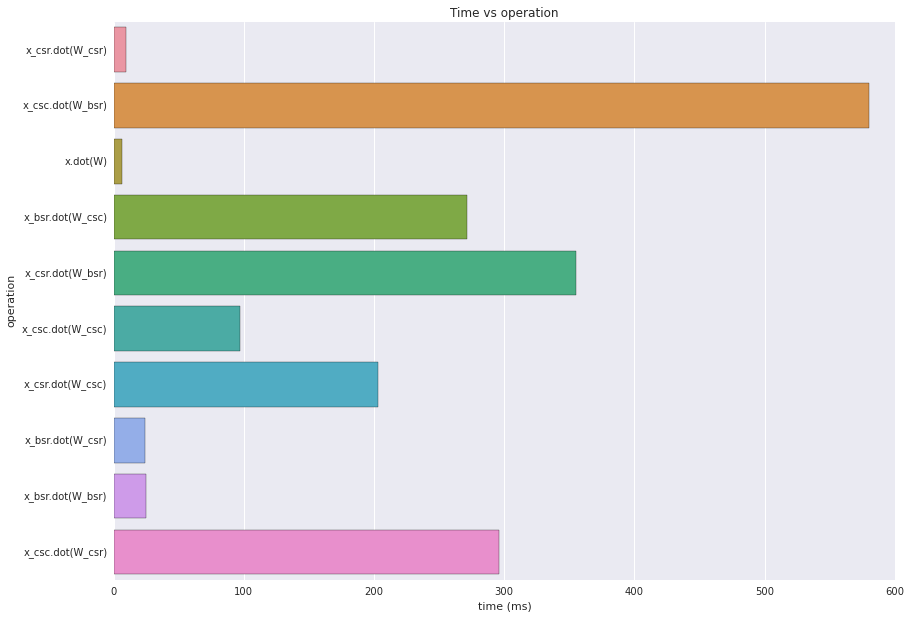

In [137]:
# generate a random sparse matrix with 50% density
W = sp.random(4096, 4096, density=0.5).A
x = sp.random(1, 4096, density=.5).A
x_csc = sp.csc_matrix(x)
x_csr = sp.csr_matrix(x)
x_bsr = sp.bsr_matrix(x)
W_csc = sp.csc_matrix(W)
W_csr = sp.csr_matrix(W)
W_bsr = sp.bsr_matrix(W)

timings = {}
for x_format, W_format in it.product(["csc", "csr","bsr"], ["csc", "csr", "bsr"]):
    stmt = "x_%s.dot(W_%s)" % (x_format, W_format)
    t = round(timeit(stmt) * 1000, 3)
    timings[stmt] = t
    # print "%s best time: %s ms" % (stmt, t)

stmt = "x.dot(W)"
t = round(timeit(stmt) * 1000, 3)
timings[stmt] = t
# print "%s best time: %s ms" % (stmt, t)

import seaborn as sns
figsize(14,10)
g = sns.barplot(np.array(timings.values()),np.array(timings.keys()),
            ax=gca(),
            orient="h")

_, labels = plt.xticks()
plt.ylabel("operation")
plt.xlabel("time (ms)")
_ = plt.title("Time vs operation")


x_density=1, W_density=0.1
--------------------------
x_csr.dot(W_csr) best time: 2.476 ms
x.dot(W) best time: 6.149 ms
x_density=1, W_density=0.15
--------------------------
x_csr.dot(W_csr) best time: 3.522 ms
x.dot(W) best time: 6.727 ms
x_density=1, W_density=0.2
--------------------------
x_csr.dot(W_csr) best time: 4.38 ms
x.dot(W) best time: 6.915 ms
x_density=1, W_density=0.25
--------------------------
x_csr.dot(W_csr) best time: 5.14 ms
x.dot(W) best time: 7.102 ms
x_density=1, W_density=0.3
--------------------------
x_csr.dot(W_csr) best time: 5.914 ms
x.dot(W) best time: 6.987 ms
x_density=1, W_density=0.35
--------------------------
x_csr.dot(W_csr) best time: 6.738 ms
x.dot(W) best time: 7.19 ms
x_density=1, W_density=0.4
--------------------------
x_csr.dot(W_csr) best time: 7.606 ms
x.dot(W) best time: 6.95 ms
x_density=1, W_density=0.45
--------------------------
x_csr.dot(W_csr) best time: 8.902 ms
x.dot(W) best time: 7.644 ms
x_density=1, W_density=0.5
-------------

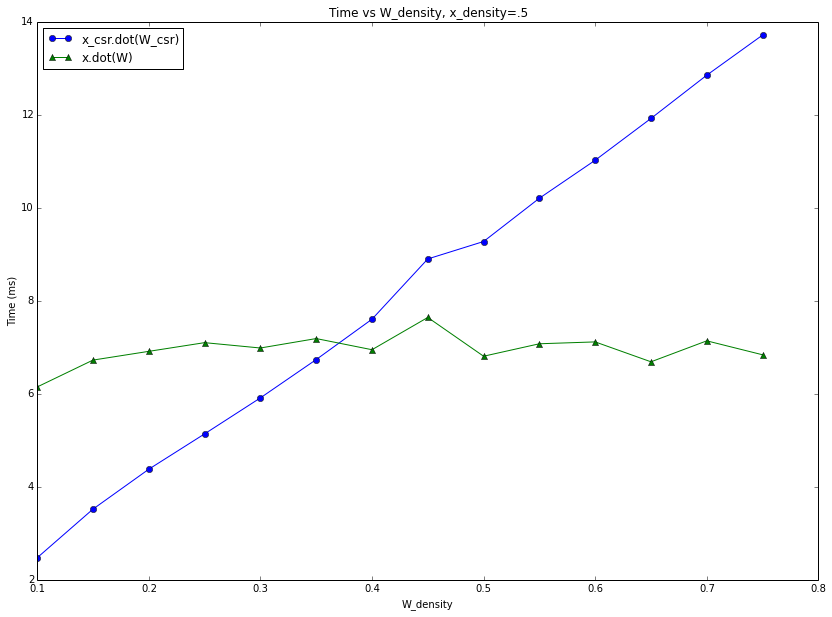

In [12]:
# generate a random sparse matrix with 50% density
timings = defaultdict(list)

for density in [.1,.15, .2,.25, .3,.35, .4,.45, .5,.55, .6,.65, .7,.75]:
    W = sp.random(4096, 4096, density=density).A
    x = sp.random(1, 4096, density=.5).A
    x_csc = sp.csc_matrix(x)
    x_csr = sp.csr_matrix(x)
    x_bsr = sp.bsr_matrix(x)
    W_csc = sp.csc_matrix(W)
    W_csr = sp.csr_matrix(W)
    W_bsr = sp.bsr_matrix(W)
    print("==========================")
    print("x_density=1, W_density=%s" % density)
    print("--------------------------")

#     for x_format, W_format in it.product(["csc", "csr","bsr"], ["csc", "csr", "bsr"]):
    for x_format, W_format in it.product(["csr"], ["csr"]):
        stmt = "x_%s.dot(W_%s)" % (x_format, W_format)
        t = round(timeit(stmt) * 1000, 3)
        timings[stmt].append((density,t))
        print "%s best time: %s ms" % (stmt, t)

    stmt = "x.dot(W)"
    t = round(timeit(stmt) * 1000, 3)
    timings[stmt].append((density,t))
    print "%s best time: %s ms" % (stmt, t)



figsize(14,10)
line_styles = ["-", "--",":"]
marker_styles = ["o", "^", "v", "p", "s"]
styles = it.cycle(it.product(line_styles,marker_styles))
for stmt, density_times in timings.items():
    fmt = "".join(styles.next())
    densities, times = zip(*density_times)
    plot(densities, times, fmt, label=stmt)

title("Time vs W_density, x_density=.5")
xlabel("W_density")
ylabel("Time (ms)")
legend(loc=2, frameon=True)

x_density=0.1, W_density=.5
--------------------------
x_csr.dot(W_csr) best time: 2.065 ms
x.dot(W) best time: 6.459 ms
x_density=0.15, W_density=.5
--------------------------
x_csr.dot(W_csr) best time: 3.143 ms
x.dot(W) best time: 6.694 ms
x_density=0.2, W_density=.5
--------------------------
x_csr.dot(W_csr) best time: 4.213 ms
x.dot(W) best time: 7.401 ms
x_density=0.25, W_density=.5
--------------------------
x_csr.dot(W_csr) best time: 4.847 ms
x.dot(W) best time: 7.264 ms
x_density=0.3, W_density=.5
--------------------------
x_csr.dot(W_csr) best time: 5.982 ms
x.dot(W) best time: 6.941 ms
x_density=0.35, W_density=.5
--------------------------
x_csr.dot(W_csr) best time: 6.636 ms
x.dot(W) best time: 7.277 ms
x_density=0.4, W_density=.5
--------------------------
x_csr.dot(W_csr) best time: 7.532 ms
x.dot(W) best time: 7.146 ms
x_density=0.45, W_density=.5
--------------------------
x_csr.dot(W_csr) best time: 8.406 ms
x.dot(W) best time: 7.236 ms
x_density=0.5, W_density=.5


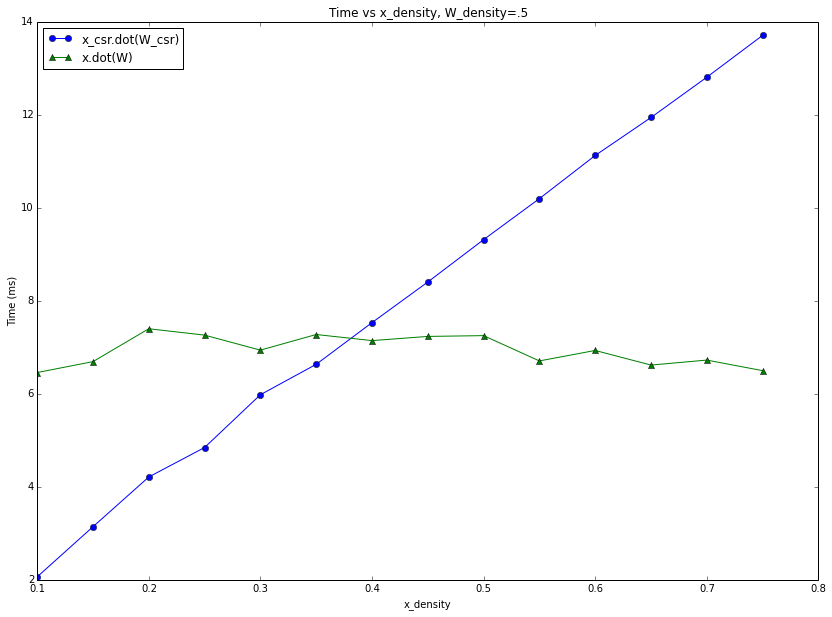

In [13]:
# generate a random sparse matrix with 50% density
timings = defaultdict(list)

for density in [.1,.15, .2,.25, .3,.35, .4,.45, .5,.55, .6,.65, .7,.75]:
    W = sp.random(4096, 4096, density=.5).A
    x = sp.random(1, 4096, density=density).A
    x_csc = sp.csc_matrix(x)
    x_csr = sp.csr_matrix(x)
    x_bsr = sp.bsr_matrix(x)
    W_csc = sp.csc_matrix(W)
    W_csr = sp.csr_matrix(W)
    W_bsr = sp.bsr_matrix(W)
    print("==========================")
    print("x_density=%s, W_density=.5" % density)
    print("--------------------------")

    
#     for x_format, W_format in it.product(["csc", "csr","bsr"], ["csc", "csr", "bsr"]):
    for x_format, W_format in it.product(["csr"], ["csr"]):
        stmt = "x_%s.dot(W_%s)" % (x_format, W_format)
        t = round(timeit(stmt) * 1000, 3)
        timings[stmt].append((density,t))
        print "%s best time: %s ms" % (stmt, t)

    stmt = "x.dot(W)"
    t = round(timeit(stmt) * 1000, 3)
    timings[stmt].append((density,t))
    print "%s best time: %s ms" % (stmt, t)



figsize(14,10)
line_styles = ["-", "--",":"]
marker_styles = ["o", "^", "v", "p", "s"]
styles = it.cycle(it.product(line_styles,marker_styles))
for stmt, density_times in timings.items():
    fmt = "".join(styles.next())
    densities, times = zip(*density_times)
    plot(densities, times, fmt, label=stmt)

title("Time vs x_density, W_density=.5")
xlabel("x_density")
ylabel("Time (ms)")
legend(loc=2, frameon=True)

In [41]:
import numpy as np
import tensorflow as tf

def dense_to_sparse(mat):
    indices = np.nonzero(mat)
    values = mat[indices]
    shape = mat.shape
    return indices, values, shape
    
a = np.random.random((100, 100))
b = np.random.random((100, 1024))
a[a < .8] = 0
a_indices, a_values, a_shape = dense_to_sparse(a)

a_sparse = tf.SparseTensorValue(a_indices, a_values, a_shape)
b_dense = tf.Variable(initial_value=b)
tf.sparse_matmul(a_sparse, b_dense, a_is_sparse=True)
sess = tf.Session()
init = tf.initialize_all_variables()
sess.run(init)

<class 'tensorflow.python.framework.ops.SparseTensorValue'>


TypeError: Expected float32, got array([ 0,  0,  0, ..., 99, 99, 99]) of type 'ndarray' instead.

In [ ]:
a_sparse = tf.SparseTensorValue

In [ ]:
a_sparse = tf.SparseTensor

TypeError: Expected float32, got array([ 0,  0,  0, ..., 99, 99, 99]) of type 'ndarray' instead.